<a href="https://colab.research.google.com/github/pabloalfaro/drl-grid/blob/main/pruebas/Pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install grid2op[optional]  # Para ejecutar el código en Colab

     |████████████████████████████████| 11.8MB 246kB/s 
     |████████████████████████████████| 5.8MB 23.2MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 122kB 55.1MB/s 
     |████████████████████████████████| 1.5MB 29.7MB/s 
     |████████████████████████████████| 20.6MB 6.3MB/s 
     |████████████████████████████████| 3.3MB 30.1MB/s 
     |████████████████████████████████| 296kB 56.3MB/s 
     |████████████████████████████████| 153kB 55.7MB/s 
     |████████████████████████████████| 3.2MB 44.4MB/s 
  Created wheel for grid2op: filename=Grid2Op-1.6.0.post1-cp37-none-any.whl size=12135502 sha256=6b07ba705f2b73044261c955a24fb25f5d658d2597ae51c3014dfc2823da4eb9
  Stored in directory: /root/.cache/pip/wheels/5d/f9/09/f449edc7f7156cb397fbf12cc5b16480a3942fe6ea957e3954
  Created wheel for pandapower: filename=pandapower-2.7.0-cp37-none-any.whl size=5777357 sha256=f88d0de59f0896a5c7c71679fb8e1a3b15e11711a69c6bf3571867d2eb677cee
  Stored in

In [2]:
 !pip install jyquickhelper # Para ejecutar el código en Colab

In [3]:
import os
import sys
import grid2op

In [4]:
# import the usefull classes
import numpy as np
import shutil
from tqdm.notebook import tqdm  # for easy progress bar

from grid2op import make
from grid2op.Agent import DoNothingAgent

from grid2op.Reward import GameplayReward, L2RPNReward

max_iter = 50 # Se consideran 50 iteraciones para que sea más rápido
train_iter = 50
max_eval_step = 20
env_name = "rte_case14_redisp"
env = make(env_name, test=False, reward_class=L2RPNReward)
env.seed(0)  # Una semilla para que los agentes sean reproducibles
my_agent = DoNothingAgent(env.action_space)
my_agent.seed(0)  # Semilla para que las acciones del agente sean las mismas

/usr/local/lib/python3.7/dist-packages/grid2op/MakeEnv/Make.py:330: UserWarning: It is the first time you use the environment "rte_case14_redisp".
We will attempt to download this environment from remote
  warnings.warn(_MAKE_FIRST_TIME_WARN.format(dataset_name))


downloading the training data, this may take a while.


rte_case14_redisp.tar.bz2: 292MB [00:08, 34.4MB/s]                           


Extract the tar archive in "/root/data_grid2op"
You may now use the environment "rte_case14_redisp" with the available data by invoking:
	env = grid2op.make("rte_case14_redisp")


((0,), (0,))

In [ ]:
# Al pasar el entorno al cannon de Gym, utiliza un diccionario de espacios para representar el espacio de observaciones. Este soporte está incluido en al rama master de stable baselines 3 desde
# hace muy poco, si no especificamos la URL del repo en lugar de pip install stable-baselines3 nos aparecerá una excepción
!pip install git+https://github.com/DLR-RM/stable-baselines3

  Cloning https://github.com/DLR-RM/stable-baselines3 to /tmp/pip-req-build-97qt19ic
  Running command git clone -q https://github.com/DLR-RM/stable-baselines3 /tmp/pip-req-build-97qt19ic
  Created wheel for stable-baselines3: filename=stable_baselines3-1.2.0a0-cp37-none-any.whl size=160875 sha256=88b764d673dcffd5e919f448f9e1d8e344dcf413a2d59c9d4b1f0a6d6c6ecd6b
  Stored in directory: /tmp/pip-ephem-wheel-cache-klk7j4e9/wheels/cf/89/6b/cd4b89427eb5ff0858bcba73911088d606c59eb3a97290b1bb
Successfully built stable-baselines3


In [ ]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 43kB/s 
     |████████████████████████████████| 3.8MB 46.8MB/s 
     |████████████████████████████████| 512kB 49.8MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=b34ab87ff2373c447fbc813be39c35846d21f23d607fff79e5ebf238710575da
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.13.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.0 which is incompatible.
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installati

In [ ]:
import gym

from grid2op.Reward import L2RPNReward
#from gym.core import GoalEnv
from grid2op.gym_compat import GymEnv, MultiDiscreteActSpace
# from stable_baselines.common.policies import MlpPolicy
from stable_baselines3.common.policies import BasePolicy
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.env_checker import check_env
from pprint import pprint #Para ver los diccionarios con una estructura más elegante de la que ofrece print convencional

In [ ]:
# Adaptamos el entorno (espacio de acciones y observaciones) al estándar de gym
gym_env = GymEnv(env)
# Aunque el espacio de observaciones y acciones ya es correcto, Stable Baselines 3 no tiene soporte para espacio de acciones mixtos basados en diccionarios
# Por lo que no nos queda más remedio que discretizar todo el espacio de acciones (leer docstring de https://github.com/rte-france/Grid2Op/blob/master/grid2op/gym_compat/multidiscrete_gym_actspace.py)
print("Espacio de acciones original: {}".format(gym_env.action_space))
gym_env.action_space = MultiDiscreteActSpace(gym_env.init_env.action_space)
print("Espacio de acciones discretizado: {}".format(gym_env.action_space))
#IMPORTANTE: En el docstring de https://github.com/rte-france/Grid2Op/blob/master/grid2op/gym_compat/multidiscrete_gym_actspace.py recomienda no usar change_bus y set_bus al mismo tiempo. Cosa que aquí está haciendo.
#            Como no sé el funcionamiento en detalle no lo he quitado, pero lo dejo anotado aquí para que se tenga en cuenta.

Espacio de acciones original: Dict(change_bus:MultiBinary(56), change_line_status:MultiBinary(20), redispatch:Box(-10.0, 10.0, (5,), float32), set_bus:Box(-1, 2, (56,), int32), set_line_status:Box(-1, 1, (20,), int32))
Espacio de acciones discretizado: MultiDiscrete([2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 7 7 1 1 7 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3])


/usr/local/lib/python3.7/dist-packages/grid2op/gym_compat/multidiscrete_gym_actspace.py:170: UserWarning: The class "MultiDiscreteActSpace" should mainly be used to consider only discrete actions (eg. set_line_status, set_bus or change_bus). Though it is possible to use "redispatch" when building it, be aware that this continuous action will be treated as discrete by splitting it into bins. Consider using the "BoxGymActSpace" for these attributes.
  warnings.warn(f"The class \"MultiDiscreteActSpace\" should mainly be used to consider only discrete "


In [ ]:
#El espacio de observaciones si puede ser un diccinario gracias al reciente soporte añadido por Stable Baselines 3
print(gym_env.observation_space)

Dict(_shunt_bus:Box(-2147483648, 2147483647, (1,), int32), _shunt_p:Box(-inf, inf, (1,), float32), _shunt_q:Box(-inf, inf, (1,), float32), _shunt_v:Box(-inf, inf, (1,), float32), a_ex:Box(0.0, inf, (20,), float32), a_or:Box(0.0, inf, (20,), float32), actual_dispatch:Box(-300.0, 300.0, (5,), float32), attention_budget:Box(0.0, inf, (1,), float32), curtailment:Box(0.0, 1.0, (5,), float32), curtailment_limit:Box(0.0, 1.0, (5,), float32), day:Discrete(32), day_of_week:Discrete(8), duration_next_maintenance:Box(-1, 2147483647, (20,), int32), gen_p:Box(-7.710000038146973, 307.71002197265625, (5,), float32), gen_p_before_curtail:Box(-7.710000038146973, 307.71002197265625, (5,), float32), gen_q:Box(-inf, inf, (5,), float32), gen_v:Box(0.0, inf, (5,), float32), hour_of_day:Discrete(24), is_alarm_illegal:Discrete(2), line_status:MultiBinary(20), load_p:Box(-inf, inf, (11,), float32), load_q:Box(-inf, inf, (11,), float32), load_v:Box(0.0, inf, (11,), float32), minute_of_hour:Discrete(60), month:D

In [ ]:
# Stable baselines 3 incluye un comprobador de entornos para determinar si puede funcionar correctamente
# Recomiendo usarlo ya que los warnings también me han sido de gran ayuda para entender qué estaba ocurriendo
check_env(gym_env)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------
| time/              |      |
|    fps             | 12   |
|    iterations      | 1    |
|    time_elapsed    | 161  |
|    total_timesteps | 2048 |
-----------------------------


(OrderedDict([('_shunt_bus', array([1], dtype=int32)),
              ('_shunt_p', array([0.], dtype=float32)),
              ('_shunt_q', array([-18.181551], dtype=float32)),
              ('_shunt_v', array([0.20347077], dtype=float32)),
              ('a_ex',
               array([1.5279462e+02, 1.5564056e+02, 3.1809020e+04, 3.7224707e+04,
                      1.8109295e+04, 3.5398098e+03, 1.5551061e+04, 8.6902229e+01,
                      1.7809909e+02, 1.6143216e+02, 1.4137451e+02, 1.2031147e+02,
                      2.1176879e+04, 1.9152986e+04, 4.4120004e+04, 1.0760090e+03,
                      4.4836777e+04, 1.3432764e+05, 1.8571010e+02, 7.7197602e+04],
                     dtype=float32)),
              ('a_or',
               array([  160.17882 ,   144.22626 , 31809.02    , 37224.707   ,
                      18109.295   ,  3539.8098  , 15551.061   ,    91.43822 ,
                        169.88608 ,   151.45702 ,   136.38007 ,   120.31147 ,
                      21176.879 

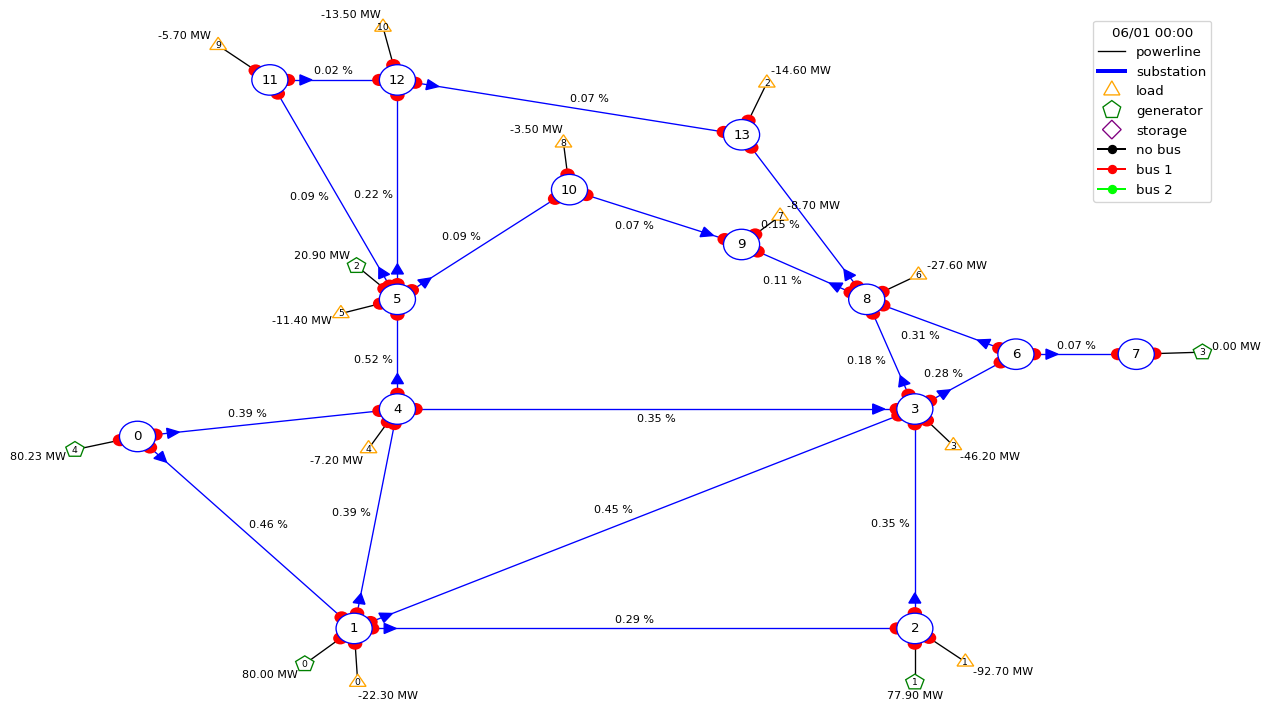

In [ ]:
#env.action_space.to_json
#wra_env = BasicWrapper(env)

# Para que el problema sea resoluble con un espacio de observaciones mixto (Dict) es necesario cambiar el tipo de red a MultiInputPolicy
model = PPO("MultiInputPolicy", gym_env, verbose=1)
model.learn(total_timesteps=train_iter)

obs = gym_env.reset()
for i in range(max_iter):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = gym_env.step(action)
    env.render()
    if done:
      obs = gym_env.reset()
gym_env.step(action)

In [ ]:
display_tqdm = True

max_iter = 1000

all_obs = []
obs = gym_env.reset()
all_obs.append(obs)
reward = env.reward_range[0]
done = False
nb_step = 0

with tqdm(total=max_iter, disable=not display_tqdm) as pbar:
    for i in range(max_iter):
      # action = my_agent.act(obs, reward, done)
      action, _states = model.predict(obs, deterministic=True)
      # obs, reward, done, _ = env.step(action)
      obs, reward, done, info = gym_env.step(action)
      env.render()
      pbar.update(1)
      if done:
        obs = gym_env.reset()
      all_obs.append(obs)
      nb_step += 1
gym_env.step(action)
gym_env.render()

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
modelA2C = A2C("MultiInputPolicy", gym_env, verbose=1)
modelA2C.learn(total_timesteps=train_iter)

display_tqdm = True

max_iter = 1000

all_obs = []
obs = gym_env.reset()
all_obs.append(obs)
reward = env.reward_range[0]
done = False
nb_step = 0

with tqdm(total=max_iter, disable=not display_tqdm) as pbar:
  for i in range(max_iter):
    # action = my_agent.act(obs, reward, done)
    action, _states = modelA2C.predict(obs, deterministic=True)
    # obs, reward, done, _ = env.step(action)
    obs, reward, done, info = gym_env.step(action)
    env.render()
    pbar.update(1)
    if done:
      obs = gym_env.reset()
    all_obs.append(obs)
    nb_step += 1
gym_env.step(action)
env.render()

In [ ]:
from stable_baselines3 import DQN
modelDQN = DQN("MultiInputPolicy", gym_env, verbose=1)
modelDQN.learn(total_timesteps=train_iter)

display_tqdm = True

max_iter = 1000

all_obs = []
obs = gym_env.reset()
all_obs.append(obs)
reward = env.reward_range[0]
done = False
nb_step = 0

with tqdm(total=max_iter, disable=not display_tqdm) as pbar:
  for i in range(max_iter):
    # action = my_agent.act(obs, reward, done)
    action, _states = modelDQN.predict(obs, deterministic=True)
    # obs, reward, done, _ = env.step(action)
    obs, reward, done, info = gym_env.step(action)
    env.render()
    pbar.update(1)
    if done:
      obs = gym_env.reset()
    all_obs.append(obs)
    nb_step += 1
gym_env.step(action)
gym_env.render()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


AssertionError: ignored

In [6]:
pip install l2rpn-baselines

     |████████████████████████████████| 174kB 34.2MB/s 
     |████████████████████████████████| 9.5MB 35.8MB/s 
  Created wheel for l2rpn-baselines: filename=l2rpn_baselines-0.5.1-cp37-none-any.whl size=246280 sha256=543a343a7dde9bb5907d83576e8e94eaa12592d55e33b44074c1629d0af44463
  Stored in directory: /root/.cache/pip/wheels/ba/c0/fc/2d79824b69e903348a57ddbbb841b4ec2d9c3ebe936d2177f7
Successfully built l2rpn-baselines
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [40]:
import grid2op
from l2rpn_baselines.utils import TrainingParam, NNParam
from l2rpn_baselines.DeepQSimple import train

tp = TrainingParam()

li_attr_obs_X = ["day_of_week", "hour_of_day", "minute_of_hour", "prod_p", "prod_v", "load_p", "load_q",
                 "actual_dispatch", "target_dispatch", "topo_vect", "time_before_cooldown_line",
                 "time_before_cooldown_sub", "rho", "timestep_overflow", "line_status"]

observation_size = NNParam.get_obs_size(env, li_attr_obs_X)
sizes = [800, 800, 800, 494, 494, 494]  # sizes of each hidden layers
kwargs_archi = {'observation_size': observation_size,
                'sizes': sizes,
                'activs': ["relu" for _ in sizes],  # all relu activation function
                "list_attr_obs": li_attr_obs_X}

kwargs_converters = {"all_actions": None,
                     "set_line_status": False,
                     "change_bus_vect": True,
                     "set_topo_vect": False
                    }

env = grid2op.make()
# define the name of the model
nm_ = "SimpleDQN"
try:
  train(env,
        name=nm_,
        iterations=10000,
        save_path="/models",
        load_path=None,
        logs_dir="/logs",
        training_param=tp,
        kwargs_converters=kwargs_converters,
        kwargs_archi=kwargs_archi)
finally:
  env.close()

  0%|          | 0/10000 [00:00<?, ?it/s]

 10%|█         | 1000/10000 [00:50<05:19, 28.21it/s]/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/utils/DeepQAgent.py:1017: RuntimeWarning: invalid value encountered in double_scalars
  curr_inj / total_act_num,
/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/utils/DeepQAgent.py:1023: RuntimeWarning: invalid value encountered in double_scalars
  curr_volt / total_act_num,
/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/utils/DeepQAgent.py:1029: RuntimeWarning: invalid value encountered in double_scalars
  curr_topo / total_act_num,
/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/utils/DeepQAgent.py:1035: RuntimeWarning: invalid value encountered in double_scalars
  curr_line / total_act_num,
/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/utils/DeepQAgent.py:1041: RuntimeWarning: invalid value encountered in double_scalars
  curr_redisp / total_act_num,
/usr/local/lib/python3.7/dist-packages/l2rpn_baselines/utils/DeepQAgent.py:1047: RuntimeWarning: 

100%|██████████| 10000/10000 [07:51<00:00, 21.21it/s]


In [41]:
from grid2op.Reward import L2RPNSandBoxScore, L2RPNReward
from l2rpn_baselines.DeepQSimple import evaluate

evaluate(env,
         name="SimpleDQN",
         load_path="/models",
         logs_path=None,
         nb_episode=10,
         nb_process=1,
         max_steps=-1,
         verbose=False,
         save_gif=False)

TypeError: ignored

In [10]:
import grid2op
from l2rpn_baselines.DoubleDuelingDQN import train
env = grid2op.make()
res = train(env, save_path="/models", iterations=100)

Step [0] -- Random [0.99]
Survived [2] steps
Total reward [2177.1905517578125]
Survived [2] steps
Total reward [2169.473388671875]
Survived [2] steps
Total reward [2214.2823486328125]
Survived [4] steps
Total reward [4470.07763671875]
Survived [0] steps
Total reward [-10.0]
Survived [0] steps
Total reward [-10.0]
Survived [2] steps
Total reward [2158.396240234375]
Survived [5] steps
Total reward [5441.06982421875]
Survived [5] steps
Total reward [5472.5841064453125]
Survived [0] steps
Total reward [-10.0]
Survived [0] steps
Total reward [-10.0]
Survived [3] steps
Total reward [3368.6214599609375]
Survived [2] steps
Total reward [2175.8201904296875]
Survived [2] steps
Total reward [2243.662353515625]
Survived [2] steps
Total reward [2188.0301513671875]
Survived [2] steps
Total reward [2169.7113037109375]
Survived [0] steps
Total reward [-10.0]
Survived [8] steps
Total reward [8658.435546875]
Survived [3] steps
Total reward [3331.9747314453125]
Survived [3] steps
Total reward [3261.89294

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [14]:
from l2rpn_baselines.DoubleDuelingDQN import evaluate
env = grid2op.make()
res = evaluate(env, load_path="/models/DoubleDuelingDQN.h5", nb_episode=10)

Successfully loaded network from: /models/DoubleDuelingDQN.h5
Model: "DoubleDuelingDQN_NN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_obs (InputLayer)          [(None, 1748)]       0                                            
__________________________________________________________________________________________________
fc_1 (Dense)                    (None, 874)          1528626     input_obs[0][0]                  
__________________________________________________________________________________________________
tf.nn.leaky_relu_60 (TFOpLambda (None, 874)          0           fc_1[0][0]                       
__________________________________________________________________________________________________
fc_2 (Dense)                    (None, 437)          382375      tf.nn.leaky_relu_60[0][0]        
__________________

episode:  10%|█         | 1/10 [00:02<00:25,  2.80s/it]

INFO: "Env: 0.79s
	 - apply act 0.12s
	 - run pf: 0.62s
	 - env update + observation: 0.05s
Agent: 1.08s
Total time: 2.00s
Cumulative reward: 36742.882812"



episode:  20%|██        | 2/10 [00:14<01:02,  7.84s/it]

INFO: "Env: 4.02s
	 - apply act 0.64s
	 - run pf: 3.09s
	 - env update + observation: 0.29s
Agent: 5.79s
Total time: 10.54s
Cumulative reward: 206834.468750"



episode:  30%|███       | 3/10 [00:21<00:54,  7.81s/it]

INFO: "Env: 2.57s
	 - apply act 0.41s
	 - run pf: 1.98s
	 - env update + observation: 0.18s
Agent: 3.90s
Total time: 6.94s
Cumulative reward: 136169.234375"



episode:  40%|████      | 4/10 [00:23<00:33,  5.52s/it]

INFO: "Env: 0.51s
	 - apply act 0.07s
	 - run pf: 0.41s
	 - env update + observation: 0.03s
Agent: 0.61s
Total time: 1.20s
Cumulative reward: 23068.667969"



episode:  50%|█████     | 5/10 [00:26<00:21,  4.29s/it]

INFO: "Env: 0.56s
	 - apply act 0.09s
	 - run pf: 0.44s
	 - env update + observation: 0.03s
Agent: 0.63s
Total time: 1.28s
Cumulative reward: 24625.228516"



episode:  60%|██████    | 6/10 [00:28<00:14,  3.52s/it]

INFO: "Env: 0.51s
	 - apply act 0.08s
	 - run pf: 0.41s
	 - env update + observation: 0.03s
Agent: 0.62s
Total time: 1.20s
Cumulative reward: 22909.484375"



episode:  70%|███████   | 7/10 [00:29<00:08,  2.69s/it]

INFO: "Env: 0.10s
	 - apply act 0.02s
	 - run pf: 0.08s
	 - env update + observation: 0.00s
Agent: 0.04s
Total time: 0.16s
Cumulative reward: 3299.875488"



episode:  80%|████████  | 8/10 [00:32<00:05,  2.78s/it]

INFO: "Env: 0.89s
	 - apply act 0.14s
	 - run pf: 0.70s
	 - env update + observation: 0.06s
Agent: 1.18s
Total time: 2.19s
Cumulative reward: 41409.085938"



episode:  90%|█████████ | 9/10 [00:34<00:02,  2.68s/it]

INFO: "Env: 0.59s
	 - apply act 0.09s
	 - run pf: 0.47s
	 - env update + observation: 0.04s
Agent: 0.93s
Total time: 1.63s
Cumulative reward: 26246.312500"



episode: 100%|██████████| 10/10 [00:35<00:00,  3.55s/it]

INFO: "Env: 0.10s
	 - apply act 0.01s
	 - run pf: 0.08s
	 - env update + observation: 0.00s
Agent: 0.06s
Total time: 0.18s
Cumulative reward: 3359.200439"
Evaluation summary:
chronics at: 000	total reward: 36742.882812	time steps: 33/8064
chronics at: 001	total reward: 206834.468750	time steps: 174/8064
chronics at: 002	total reward: 136169.234375	time steps: 112/8064
chronics at: 003	total reward: 23068.667969	time steps: 21/8064
chronics at: 004	total reward: 24625.228516	time steps: 22/8064
chronics at: 005	total reward: 22909.484375	time steps: 21/8064
chronics at: 006	total reward: 3299.875488	time steps: 4/8064
chronics at: 007	total reward: 41409.085938	time steps: 37/8064
chronics at: 008	total reward: 26246.312500	time steps: 24/8064
chronics at: 009	total reward: 3359.200439	time steps: 4/8064
